<a href="https://colab.research.google.com/github/adilakshmivadavalli/Experience/blob/master/Geospatial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
henrychibueze_world_land_agriculture_and_population_dataset_path = kagglehub.dataset_download('henrychibueze/world-land-agriculture-and-population-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'world-land-agriculture-and-population-dataset' dataset.
Data source import complete.


# Introduction

In this notebook, we utilize GeoPandas for performing geospatial analysis on different datasets.
GeoPandas is an open source library for performing geospatial anaylsis. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

This notebook is divided into two sections, in each section geospatial analysis is carried out on world countries' argirculture and on regional based tweets pertaining to USA's presidential election.

In [13]:
#comment the line below if deep_translator library is already installed
! pip install deep_translator

In the cell below, the librarys relevant to the analysis are imported alongside the GeoPandas library.

* The **pandas** library is a parent library to GeoPandas for the loading and analysis of structured data.

* The **os** library is a python utility library that provides a portable way of using operating system-dependent functionality like directory manipulation and so on.

* The **string** library is also one of python utility library for processing string type variables

* The **re** (Regular Expression) library is used to check if a given string matches a regular expression, enabling you to search for or remove substrings from a given string. This library is used in the second section of this notebook for removing URLs from a given tweet

* The **tqdm** library is used to displays progress bars for iterations.

* The **pyplot** library from the Matplotlib package is used to making plots and graphically visualizing data

* The *TextBlob* class in the **textblob** library is used to process and perform sentiment analysis on textual data.

* The *GoogleTranslator* class in the **deep_translator** library is used to translate the text of any given language into any given target language.


In [14]:
import pandas as pd
import geopandas as gpd
import os, string, re, tqdm
from matplotlib import pyplot as plt
from textblob import TextBlob
from deep_translator import GoogleTranslator as Translator
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

# Section One
Geospatial data analysis on world countries' argirculture.

In [15]:
agriculture_df = pd.read_csv(
    '/content/sample_data/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3470479.csv',
    on_bad_lines='skip', skiprows=4
)

## Data Loading and Cleaning

The first dataset contains information on world countries' argircultural land percentage from 1960 to 2020 as well as the country name and code. Below that dataset is loaded from csv file format into a pandas DataFrame object and the first five rows aree viewed.

Next, missing values are checked with the *isna()* method from the *DataFrame()* class and the number of NaN values are counted with the *sum()* method to give the total number of NaN values present in each column of the dataframe

In [16]:
agriculture_df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2017                9
2018                9
2019              266
2020              266
Unnamed: 65       266
Length: 66, dtype: int64

It is observed that all the values of 1960, 2019 and 2020 columns were all missing, so in the next cell the columns are removed alongside the 'Country Name', 'Indicator Name' and 'Indicator Code' columns with the aid of the *drop()* method. The 'Country Code' column hoewever is kept intact because it would serve as the pivot for merging the dataset with the world countries geospatial dataset.

In [17]:
irrelevant_cols = ['Country Name', 'Indicator Name', 'Indicator Code', '1960', '2019', '2020']
agriculture_df = agriculture_df.drop(irrelevant_cols, axis=1)

Next the world countries' population dataset is loaded and viewed similar to that of the agricultural land percentage dataset.

In [19]:
population_df = pd.read_csv(
    '/content/sample_data/API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv',
    on_bad_lines='skip', skiprows=4
)

population_df.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54208.0      55434.0      56234.0      56699.0      57029.0   
1  130836765.0  134159786.0  137614644.0  141202036.0  144920186.0   
2    8996967.0    9169406.0    9351442.0    9543200.0    9744772.0   
3   96396419.0   98407221.0  100506960.0  102691339.0  104953470.0   
4    5454938.0    5531451.0    5608499.0    5679409.0    5734995.0   

          1965  ...         2012         2013         2014         2015  \
0      57357.0  ...     102565.0     103165.0     103776.0     104339.0   
1  148769974.0  ...  547482863.0  562601578.0  578075373.0  593871847.0   
2    9956318.0  ...   31161378.0   32269592.0   33370804.0   34413603.0   
3  107289875.0  ...  370243017.0  380437896.0  390882979.0  401586651.0   
4    5770573.0  ...   25107925.0   26015786.0   26941773.0   27884380.0   

          2016         2017         2018         2019         2020  \
0     104865.0     105361.0     105846.0     106310.0     106766.0   
1  609978946.0  626392880.0  643090131.0  660046272.0  677243299.0   
2   35383028.0   36296111.0   37171922.0   38041757.0   38928341.0   
3  412551299.0  423769930.0  435229381.0  446911598.0  458803476.0   
4   28842482.0   29816769.0   30809787.0   31825299.0   32866268.0   

   Unnamed: 65  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 66 columns]

Next missing values in each column is checked

In [20]:
population_df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2017                2
2018                2
2019                2
2020                2
Unnamed: 65       266
Length: 66, dtype: int64

It is observed that most of the data is intact and only two rows are missing from each date column.
In this case the NaN values are ignored for now until after merging with the world countries geospatial dataset, and the irrelevant columns are removed.

In [21]:
irrelevant_cols = [i for i in irrelevant_cols if i not in ['1960', '2019', '2020']]
population_df = population_df.drop(irrelevant_cols, axis=1)

Next we load the world countries geospatial dataset into a GeoDataFrame object and view the first five rows.

In [29]:
import os
print(os.listdir('/content/sample_data/'))

['README.md', 'anscombe.json', 'API_SP.POP.TOTL_DS2_en_csv_v2_3469297.csv', '.ipynb_checkpoints', 'CIS7030_S2_21_Task2_Data.csv', 'API_AG.LND.AGRI.ZS_DS2_en_csv_v2_3470479.csv', 'World_Cities.geojson', 'mnist_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv', 'california_housing_test.csv']


In [31]:
gdf.isna().sum()

FID           0
OBJECTID      0
CITY_NAME     0
GMI_ADMIN     0
ADMIN_NAME    0
FIPS_CNTRY    0
CNTRY_NAME    0
STATUS        0
POP           0
POP_RANK      0
POP_CLASS     0
PORT_ID       0
LABEL_FLAG    0
POP_SOURCE    0
geometry      0
dtype: int64

 The world countries geospatial dataset is merged with the world countries' argircultural land percentage and the world countries' population dataset with the 'iso_a3' and 'Country Code' as pivot columns for the datasets respectively.

An inner merging is performed via the *GeoDataFrame* class method *merge()*, the left_on and right_on arguments are corresponding to columns that serve as pivot for merging in the left and right dataframes.

<a href='https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/'>Learn more on the different types of merges here.</a>

In [33]:
gdf.isna().sum()

FID           0
OBJECTID      0
CITY_NAME     0
GMI_ADMIN     0
ADMIN_NAME    0
FIPS_CNTRY    0
CNTRY_NAME    0
STATUS        0
POP           0
POP_RANK      0
POP_CLASS     0
PORT_ID       0
LABEL_FLAG    0
POP_SOURCE    0
geometry      0
dtype: int64

It is observed that the missing values after the merge are few and hence can be done away with.

In [35]:
gdf.isna().sum()

FID           0
OBJECTID      0
CITY_NAME     0
GMI_ADMIN     0
ADMIN_NAME    0
FIPS_CNTRY    0
CNTRY_NAME    0
STATUS        0
POP           0
POP_RANK      0
POP_CLASS     0
PORT_ID       0
LABEL_FLAG    0
POP_SOURCE    0
geometry      0
dtype: int64

## Exploratory Data Analysis

Here data is graphically visualized for analysis so as to deduce patterns, correlations and relationships between data features

Available columns: Index(['FID', 'OBJECTID', 'CITY_NAME', 'GMI_ADMIN', 'ADMIN_NAME', 'FIPS_CNTRY',
       'CNTRY_NAME', 'STATUS', 'POP', 'POP_RANK', 'POP_CLASS', 'PORT_ID',
       'LABEL_FLAG', 'POP_SOURCE', 'geometry'],
      dtype='object')


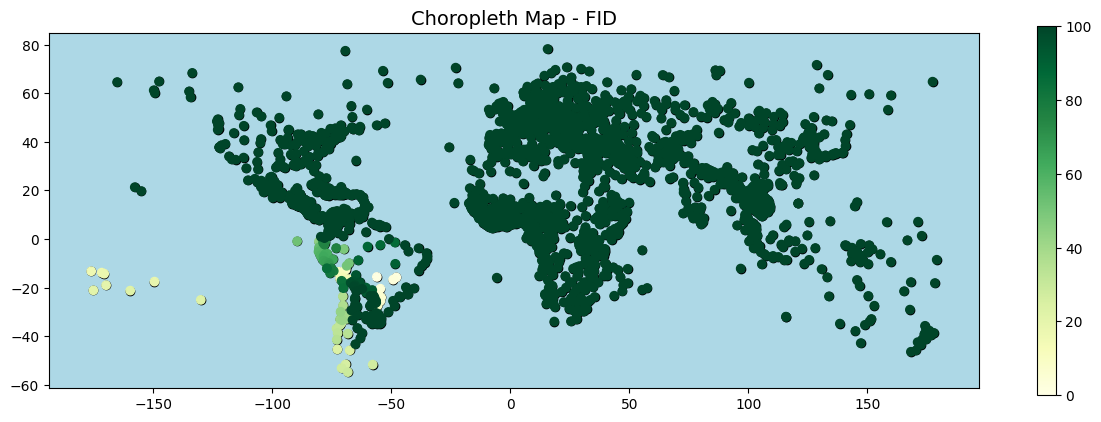

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the geojson file
gdf = gpd.read_file("/content/sample_data/World_Cities.geojson")

# Inspect available columns
print("Available columns:", gdf.columns)

# ✅ Pick a numeric column to plot choropleth.
# If there is none, we'll create a dummy one for demonstration.
numeric_cols = gdf.select_dtypes(include=['number']).columns
if len(numeric_cols) == 0:
    # Create a dummy numeric column for visualization
    import numpy as np
    gdf['dummy_value'] = np.random.randint(0, 100, len(gdf))
    column_to_plot = 'dummy_value'
else:
    column_to_plot = numeric_cols[0]  # pick the first numeric column

# Define plotting parameters
base_edgecolor = "black"
figsize = (15, 8)
legend_shrink_ratio = 0.6
background_color = "lightblue"

# Plot base layer
base = gdf.plot(edgecolor=base_edgecolor, figsize=figsize)

# Plot choropleth
gdf.plot(
    column=column_to_plot,
    ax=base,
    cmap='YlGn',
    legend=True,
    vmin=0,
    vmax=100,
    legend_kwds={'shrink': legend_shrink_ratio}
)

plt.title(f'Choropleth Map - {column_to_plot}', fontsize=14)
ax = plt.gca()
ax.set_facecolor(background_color)
plt.show()


In [47]:
import folium

pop_col = 'POP'  # detected population column

# Calculate mean lat/lon for map center
mean_lat = gdf.geometry.y.mean()
mean_lon = gdf.geometry.x.mean()

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=2)

for idx, row in gdf.iterrows():
    if row.geometry.geom_type == "Point" and not pd.isnull(row[pop_col]):
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=max(3, min(row[pop_col]**0.3, 25)),  # scale by population
            popup=f"{row['CITY_NAME']}<br>Population: {int(row[pop_col])}",
            color="crimson",
            fill=True,
            fill_opacity=0.6
        ).add_to(m)

m


In [49]:
# ============================================================
# 🗺️ 1. Install and Import Required Libraries
# ============================================================
!pip install geopandas folium plotly shapely

import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
from shapely.geometry import Point

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


In [50]:
# ============================================================
# 📥 2. Load the GeoJSON File
# ============================================================
# Update path if needed (Colab automatically stores uploaded files in /content)
file_path = "/content/sample_data/World_Cities.geojson"

gdf = gpd.read_file(file_path)
gdf.head()


FID  OBJECTID             CITY_NAME GMI_ADMIN          ADMIN_NAME  \
0    1         1                Cuiaba   BRA-MGR         Mato Grosso   
1    2         2              Brasilia   BRA-DFD    Distrito Federal   
2    3         3               Goiania   BRA-GOI               Goias   
3    4         4          Campo Grande   BRA-MGD  Mato Grosso do Sul   
4    5         5  Pedro Juan Caballero   PRY-AMM             Amambay   

  FIPS_CNTRY CNTRY_NAME                           STATUS      POP  POP_RANK  \
0         BR     Brazil               Provincial capital   540814         3   
1         BR     Brazil  National and provincial capital  2481272         2   
2         BR     Brazil               Provincial capital  1297154         2   
3         BR     Brazil               Provincial capital   776242         3   
4         PA   Paraguay               Provincial capital        0         0   

                POP_CLASS  PORT_ID  LABEL_FLAG         POP_SOURCE  \
0      500,000 to 999,999        0           0  UN_Data_2010_2020   
1  1,000,000 to 4,999,999        0           0  UN_Data_2010_2020   
2  1,000,000 to 4,999,999        0           0  UN_Data_2010_2020   
3      500,000 to 999,999        0           0  UN_Data_2010_2020   
4                                0           0                      

                      geometry  
0      POINT (-56.093 -15.615)  
1  POINT (-47.89775 -15.79211)  
2      POINT (-49.255 -16.727)  
3      POINT (-54.616 -20.451)  
4      POINT (-55.748 -22.533)

In [52]:
# ============================================================
# 🌍 3. Explore Basic Information
# ============================================================
print("Number of rows:", len(gdf))
print("\nCRS (Coordinate Reference System):", gdf.crs)
print("\nColumns:", gdf.columns.tolist())
print("\nGeometry Type:", gdf.geom_type.unique())

# Summary statistics of numerical columns
print("\nSummary statistics:")
print(gdf.describe())

# Check for missing values
print("\nMissing values:")
print(gdf.isnull().sum())


Number of rows: 2540

CRS (Coordinate Reference System): EPSG:4326

Columns: ['FID', 'OBJECTID', 'CITY_NAME', 'GMI_ADMIN', 'ADMIN_NAME', 'FIPS_CNTRY', 'CNTRY_NAME', 'STATUS', 'POP', 'POP_RANK', 'POP_CLASS', 'PORT_ID', 'LABEL_FLAG', 'POP_SOURCE', 'geometry']

Geometry Type: ['Point']

Summary statistics:
               FID     OBJECTID           POP     POP_RANK       PORT_ID  \
count  2540.000000  2540.000000  2.540000e+03  2540.000000   2540.000000   
mean   1270.500000  1270.500000  5.355373e+05     1.713386   8250.175984   
std     733.379165   733.379165  1.652592e+06     2.123718  17167.206946   
min       1.000000     1.000000  0.000000e+00     0.000000      0.000000   
25%     635.750000   635.750000  0.000000e+00     0.000000      0.000000   
50%    1270.500000  1270.500000  0.000000e+00     0.000000      0.000000   
75%    1905.250000  1905.250000  3.274780e+05     4.000000      0.000000   
max    2540.000000  2540.000000  2.612100e+07     7.000000  62950.000000   

        LA

In [53]:
# ============================================================
# 📌 4. GeoPandas Operations
# ============================================================

# Reproject (optional) to WGS84 if not already
if gdf.crs is None or gdf.crs.to_string() != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

# Bounding box
print("Bounding box:", gdf.total_bounds)

# Area, length, centroid calculations (if polygonal data)
if gdf.geom_type.isin(["Polygon", "MultiPolygon"]).any():
    gdf["area"] = gdf.geometry.area
    gdf["centroid"] = gdf.geometry.centroid

# Buffer demo (e.g., 1 degree buffer for point geometries)
if gdf.geom_type.isin(["Point"]).any():
    gdf["buffered"] = gdf.geometry.buffer(1)

# Spatial filtering: cities within latitude > 0
gdf_filtered = gdf[gdf.geometry.y > 0]
print("\nSample of filtered rows (latitude > 0):")
print(gdf_filtered.head())


Bounding box: [-176.15156364  -54.792       179.22188736   78.20000103]

Sample of filtered rows (latitude > 0):
     FID  OBJECTID    CITY_NAME GMI_ADMIN             ADMIN_NAME FIPS_CNTRY  \
171  172       172    Galveston   USA-TEX                  Texas         US   
172  173       173  Yellowknife   CAN-NTR  Northwest Territories         CA   
173  174       174       Juneau   USA-ALK                 Alaska         US   
174  175       175      Jackson   USA-MSP            Mississippi         US   
175  176       176  Baton Rouge   USA-LOU              Louisiana         US   

        CNTRY_NAME              STATUS     POP  POP_RANK           POP_CLASS  \
171  United States               Other   50446         6    50,000 to 99,999   
172         Canada  Provincial capital       0         0                       
173  United States  Provincial capital   31974         7    Less than 50,000   
174  United States  Provincial capital    4642         7    Less than 50,000   
175  United 

/tmp/ipython-input-1566363663.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["buffered"] = gdf.geometry.buffer(1)


In [58]:
# ============================================================
# 📈 6. Plotly Visualizations (Choropleth / Scatter Mapbox)
# ============================================================

# If points: Scatter Mapbox
if gdf.geom_type.isin(["Point"]).any():
    df_points = pd.DataFrame({
        "lat": gdf.geometry.y,
        "lon": gdf.geometry.x,
        "name": gdf.index.astype(str)
    })
    fig = px.scatter_mapbox(
        df_points,
        lat="lat", lon="lon", hover_name="name",
        zoom=1, height=500
    )
    fig.update_layout(mapbox_style="open-street-map")
    fig.show()

# If polygons: Choropleth demo
if gdf.geom_type.isin(["Polygon", "MultiPolygon"]).any():
    fig = px.choropleth_mapbox(
        gdf,
        geojson=gdf.geometry.__geo_interface__,
        locations=gdf.index,
        color=gdf.columns[0],  # pick a numeric or categorical column
        mapbox_style="carto-positron",
        zoom=1, center={"lat": 0, "lon": 0},
        opacity=0.5
    )
    fig.show()


In [59]:
# ============================================================
# 🧭 7. Spatial Joins & Queries (Advanced GeoPandas)
# ============================================================

# Example: join cities to a buffered region or itself
if "buffered" in gdf.columns:
    buffered_gdf = gdf[["buffered"]].rename(columns={"buffered": "geometry"})
    joined = gpd.sjoin(gdf.set_geometry("geometry"), buffered_gdf, how="inner", predicate="within")
    print("Spatial join result sample:")
    print(joined.head())


Spatial join result sample:
   FID  OBJECTID             CITY_NAME GMI_ADMIN          ADMIN_NAME  \
0    1         1                Cuiaba   BRA-MGR         Mato Grosso   
1    2         2              Brasilia   BRA-DFD    Distrito Federal   
2    3         3               Goiania   BRA-GOI               Goias   
3    4         4          Campo Grande   BRA-MGD  Mato Grosso do Sul   
4    5         5  Pedro Juan Caballero   PRY-AMM             Amambay   

  FIPS_CNTRY CNTRY_NAME                           STATUS      POP  POP_RANK  \
0         BR     Brazil               Provincial capital   540814         3   
1         BR     Brazil  National and provincial capital  2481272         2   
2         BR     Brazil               Provincial capital  1297154         2   
3         BR     Brazil               Provincial capital   776242         3   
4         PA   Paraguay               Provincial capital        0         0   

                POP_CLASS  PORT_ID  LABEL_FLAG         POP_SOURC